# Second Phase Evaluation Project - Loan Application Status Prediction

# Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
    
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

In [2]:
Df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
Df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
Df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
Df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
Df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
Df[["Loan_Amount_Term","Dependents", "LoanAmount"]].nunique()

Loan_Amount_Term     10
Dependents            4
LoanAmount          203
dtype: int64

In [8]:
Df[["Credit_History", "CoapplicantIncome"]].value_counts()

Credit_History  CoapplicantIncome
1.0             0.0                  213
0.0             0.0                   41
1.0             2083.0                 5
                2500.0                 4
                1666.0                 4
                                    ... 
                1508.0                 1
                1516.0                 1
                1522.0                 1
                1526.0                 1
                33837.0                1
Length: 270, dtype: int64

In [9]:
Df['Loan_Amount_Term'].fillna(Df['Loan_Amount_Term'].mode()[0], inplace=True)
Df["Dependents"].fillna(Df["Dependents"].mode()[0], inplace=True)
Df["Credit_History"].fillna(Df["Credit_History"].mode()[0], inplace=True)
Df['Gender'].fillna(Df['Gender'].mode()[0], inplace=True)
Df["Married"].fillna(Df["Married"].mode()[0], inplace=True)
Df["Self_Employed"].fillna(Df["Self_Employed"].mode()[0], inplace=True)

In [10]:
Df["LoanAmount"].fillna(Df["LoanAmount"].mean(), inplace=True)

In [11]:
Df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64

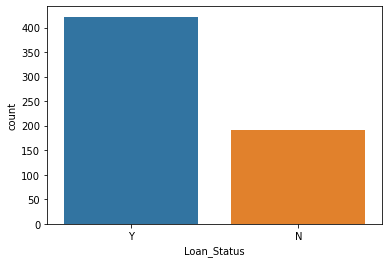

In [12]:
sns.countplot(Df['Loan_Status'])
Df.Loan_Status.value_counts()

<AxesSubplot:xlabel='Gender', ylabel='Count'>

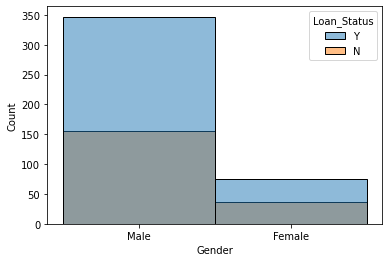

In [13]:
sns.histplot(x ="Gender", hue="Loan_Status", data = Df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

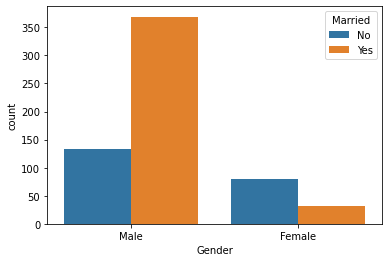

In [14]:
sns.countplot(x = "Gender",  hue="Married", data = Df)

In [15]:
Df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Here, we can observe that there is ample amount of diff. bet.% and max. Let's check more by doing EDA process.

In [16]:
Df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000


<AxesSubplot:>

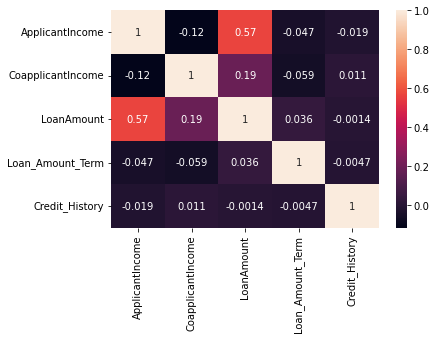

In [17]:
sns.heatmap(Df.corr(), annot = True)

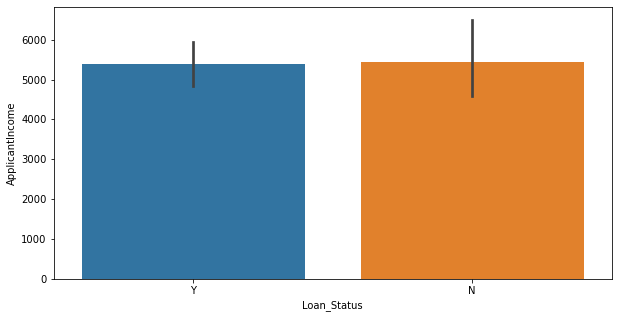

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x="Loan_Status",y="ApplicantIncome",data=Df)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

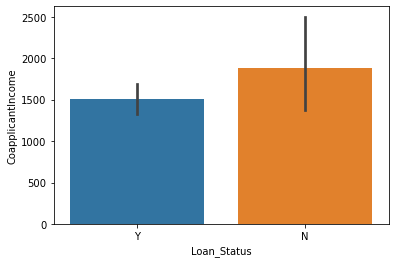

In [19]:
sns.barplot(x="Loan_Status",y= "CoapplicantIncome", data=Df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

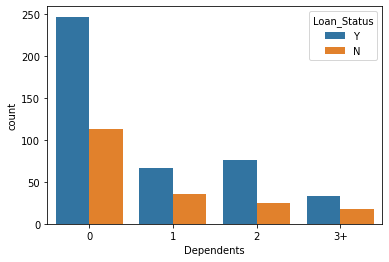

In [20]:
sns.countplot(x="Dependents",hue= "Loan_Status", data=Df)

<AxesSubplot:xlabel='Education', ylabel='count'>

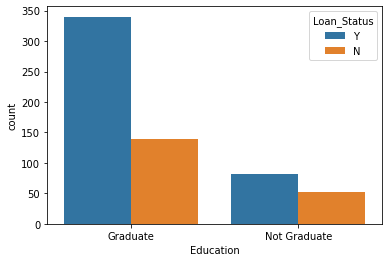

In [21]:
sns.countplot(x="Education",hue= "Loan_Status", data=Df)

1.0    525
0.0     89
Name: Credit_History, dtype: int64

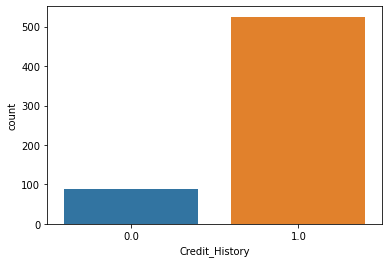

In [22]:
sns.countplot(Df['Credit_History'])
Df.Credit_History.value_counts()

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

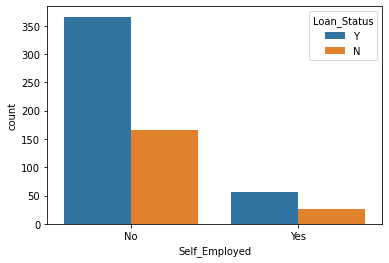

In [23]:
sns.countplot(x="Self_Employed",hue= "Loan_Status", data=Df)

In [24]:
Df.drop(["Loan_ID"], axis=1, inplace = True)

In [25]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder


In [27]:
Le = LabelEncoder()
for column in Df.columns:
    Df[column] = Le.fit_transform(Df[column])

In [28]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 40.9 KB


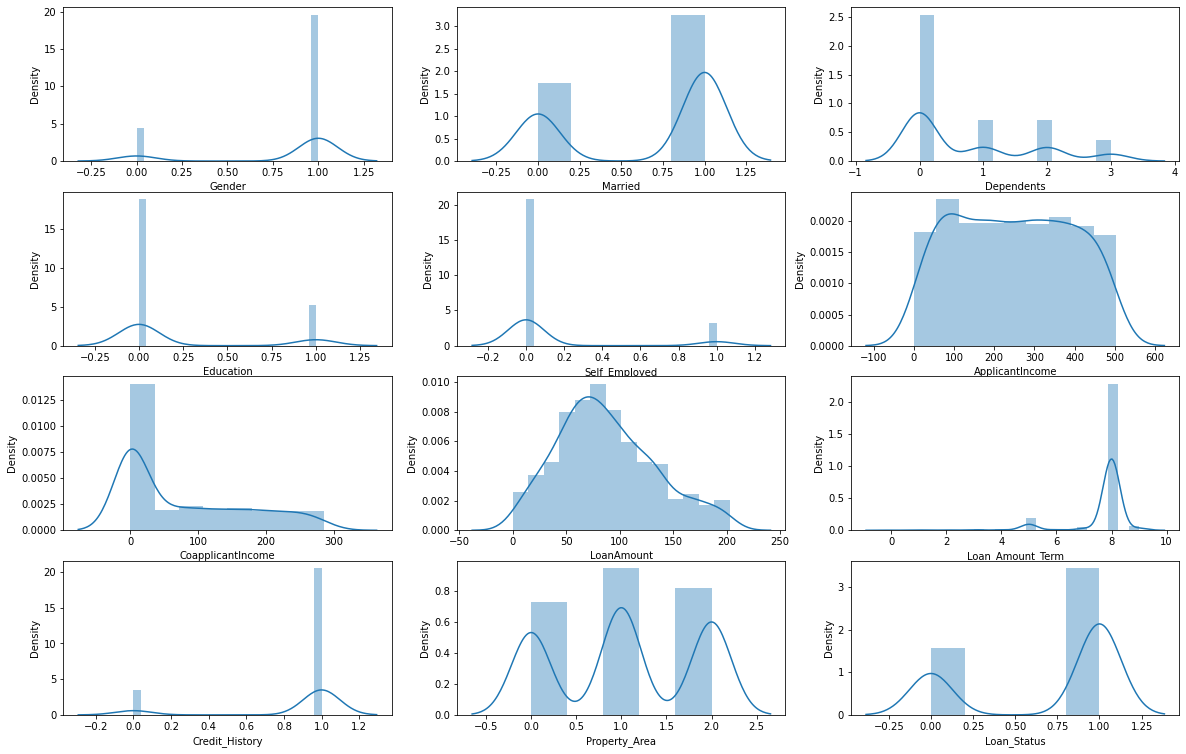

In [29]:
plt.subplots(figsize=(20, 30))
for i in enumerate(Df.columns):
    plt.subplot(9,3, i[0] + 1)
    sns.distplot(Df[i[1]])
plt.show()

# Checking outliers present in the dataset

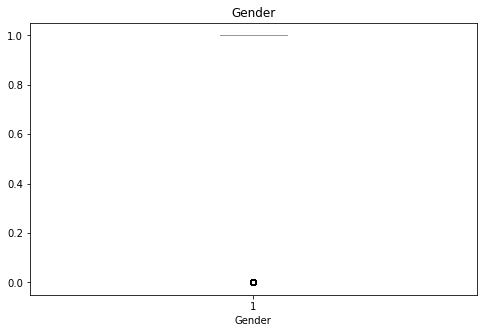

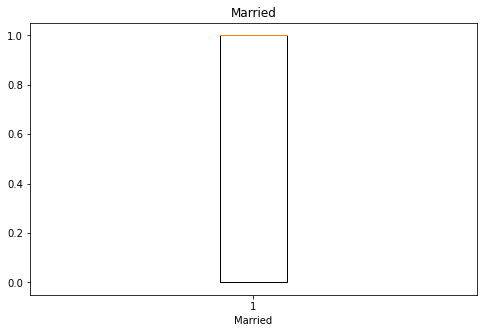

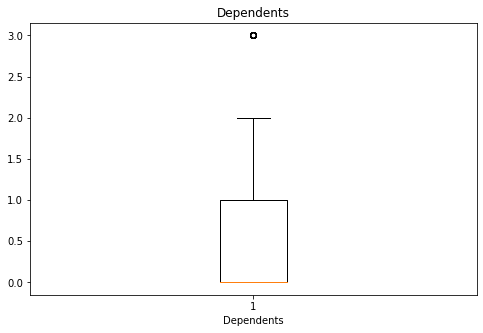

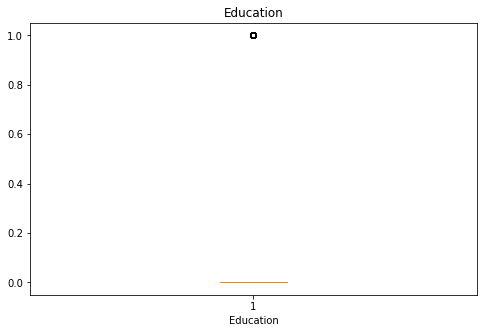

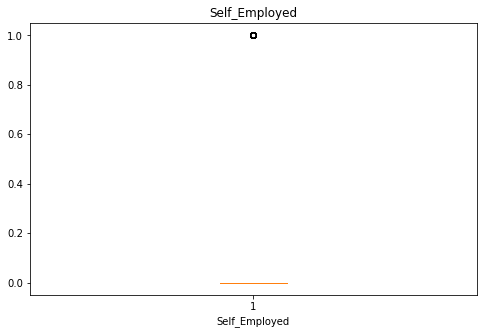

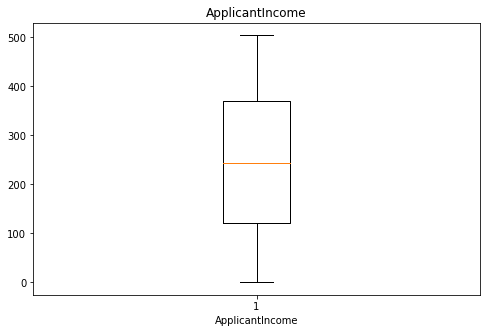

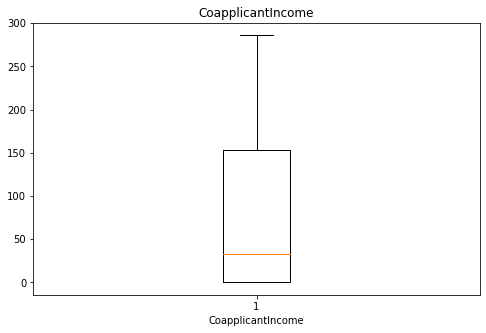

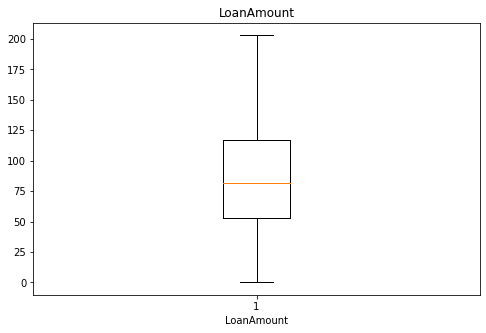

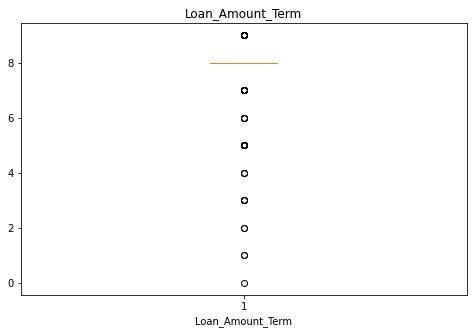

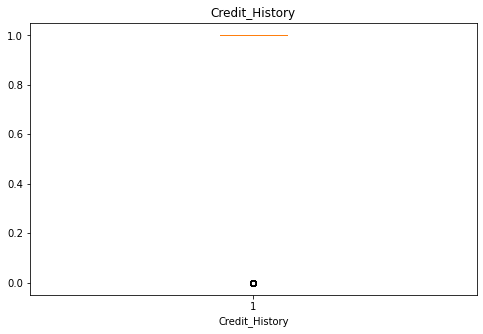

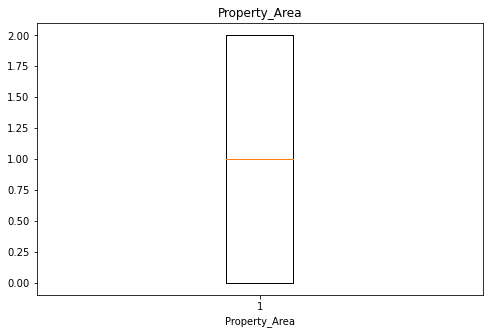

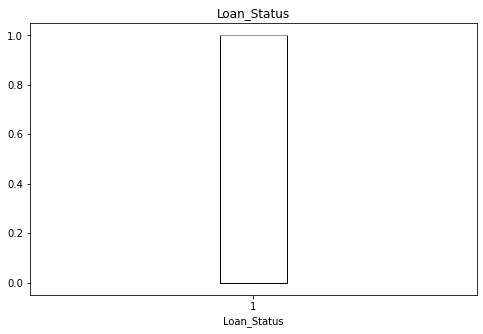

In [30]:
for j in Df.columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(Df[j], vert=True)
    plt.title(j)
    plt.xlabel(j)
    plt.show()

In [31]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Df))
threshold=3
np.where(z>3)

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
       dtype=int64),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))

In [32]:
new_data =Df[(z<3).all(axis=1)]
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,100,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1
3,1,1,0,1,0,90,160,73,8,1,2,1
4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0,29,8,1,0,1
610,1,1,3,0,0,275,0,7,5,1,0,1
611,1,1,1,0,0,431,3,163,8,1,2,1
612,1,1,2,0,0,422,0,133,8,1,2,1


In [33]:
Df.shape

(614, 12)

In [34]:
new_data.shape

(602, 12)

In [35]:
dataloss=((614-604)/614*100)                       # Check data loss in dataset after removal of outliers
dataloss

1.6286644951140066

In [36]:
#checking of skewness
new_data.skew()

Gender              -1.646147
Married             -0.643625
Dependents           1.027516
Education            1.372199
Self_Employed        2.189792
ApplicantIncome      0.037182
CoapplicantIncome    0.772613
LoanAmount           0.471894
Loan_Amount_Term    -2.771730
Credit_History      -1.989282
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64

Here, we can see that many columns skewness present and it need to be treated

In [38]:
from sklearn.preprocessing import power_transform

new_data[['CoapplicantIncome','Credit_History','Loan_Amount_Term']]=power_transform(new_data[['CoapplicantIncome','Credit_History','Loan_Amount_Term']],method='yeo-johnson')

In [39]:
new_data.skew()

Gender              -1.646147
Married             -0.643625
Dependents           1.027516
Education            1.372199
Self_Employed        2.189792
ApplicantIncome      0.037182
CoapplicantIncome   -0.047448
LoanAmount           0.471894
Loan_Amount_Term     0.488385
Credit_History      -1.989282
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64

#Now split the data into x and y

In [42]:
X = new_data.drop(["Loan_Status"], axis = 1)
Y = new_data["Loan_Status"]

In [43]:
X.shape

(602, 11)

In [44]:
Y.value_counts()

1    413
0    189
Name: Loan_Status, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [46]:
pd.DataFrame(X).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [49]:
new_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,6.020000e+02,602.000000,6.020000e+02,6.020000e+02,602.000000,602.000000
mean,0.817276,0.652824,0.739203,0.217608,0.131229,247.574751,2.146677e-16,88.244186,-3.160078e-16,-8.026064e-16,1.033223,0.686047
std,0.386762,0.476468,1.009155,0.412963,0.337932,144.175671,1.000832e+00,45.590580,1.000832e+00,1.000832e+00,0.788156,0.464484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.076391e+00,0.000000,-2.506954e+00,-2.400843e+00,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,118.250000,-1.076391e+00,54.250000,1.475823e-01,4.165204e-01,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,246.500000,3.814135e-01,83.000000,1.475823e-01,4.165204e-01,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,371.750000,9.984090e-01,117.000000,1.475823e-01,4.165204e-01,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,504.000000,1.275987e+00,203.000000,4.165894e+00,4.165204e-01,2.000000,1.000000


In [50]:
from imblearn.over_sampling import SMOTE

over_sample = SMOTE()
X, Y = over_sample.fit_resample(X, Y)

1    413
0    413
Name: Loan_Status, dtype: int64

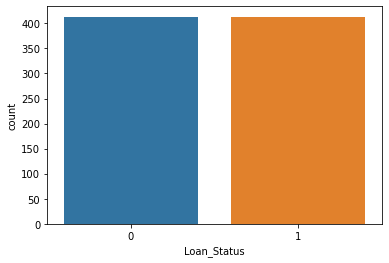

In [52]:
sns.countplot(Y)
Y.value_counts()

Now, we start building a model

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Lr=LogisticRegression()

In [62]:
max_accuracy = 0
max_random = 0

for i in range(0,500):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    Lr.fit(X_train,Y_train)
    
    predict_test=Lr.predict(X_test)
    accuracy = accuracy_score(Y_test,predict_test)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        max_random = i
print("The best test acuuracy is - ", max_accuracy, "at the random state", max_random )

The best test acuuracy is -  0.8072289156626506 at the random state 89


In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=89)
Lr.fit(X_train,Y_train)

LogisticRegression()

In [64]:
print(Lr.score(X_train,Y_train))
predict_test=Lr.predict(X_test)
predict_train=Lr.predict(X_train)

0.7090909090909091


In [66]:
print(r2_score(Y_test,predict_test))

0.22339181286549714


In [69]:
from sklearn.model_selection import cross_val_score

In [71]:
for a in range(2,10):
    cross_v_score=cross_val_score(Lr,X,Y,cv=a)
    cv_mean=cross_v_score.mean()
    print(f'At cross fold {a} the cv score is {cv_mean}')
    print('\n')

At cross fold 2 the cv score is 0.7021791767554479


At cross fold 3 the cv score is 0.6949055775142732


At cross fold 4 the cv score is 0.7130704469771587


At cross fold 5 the cv score is 0.7167287331142753


At cross fold 6 the cv score is 0.7178937903311118


At cross fold 7 the cv score is 0.7167070217917676


At cross fold 8 the cv score is 0.7191817587752054


At cross fold 9 the cv score is 0.7069729787121092




In [72]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [74]:
Dt=DecisionTreeClassifier()
Dt_score=cross_val_score(Dt,X,Y,cv=5,scoring="accuracy")
print("Cross validation - score:", np.mean(Dt_score))

Cross validation - score: 0.7482365826944141


In [76]:
Dt.fit(X_train,Y_train)
predicted_Dt=Dt.predict(X_test)
print(accuracy_score(Y_test,predicted_Dt))
print(confusion_matrix(Y_test,predicted_Dt))
print(classification_report(Y_test,predicted_Dt))
print('\n')

0.7349397590361446
[[61 15]
 [29 61]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.73        76
           1       0.80      0.68      0.73        90

    accuracy                           0.73       166
   macro avg       0.74      0.74      0.73       166
weighted avg       0.75      0.73      0.73       166





In [77]:
print("Training accuracy is -",Dt.score(X_train,Y_train))
print("Testing accuracy is -",Dt.score(X_test,Y_test))

Training accuracy is - 1.0
Testing accuracy is - 0.7349397590361446


In [78]:
Model = [KNeighborsClassifier(), SVC(), RandomForestRegressor()]

In [82]:
for m in Model:
    print("Accuracy of a Model   :", m)
    m.fit(X_train,Y_train)
    predict = m.predict(X_test)
    print("Accuracy score     :", accuracy_score(Y_test,predict_test))
    
    print("Confusion matrix   :", confusion_matrix(Y_test,predict_test))
    
    print("Classification report    :", classification_report(Y_test,predict_test))
    
    print("Training accuracy is -",m.score(X_train,Y_train))
    print("Testing accuracy is -",m.score(X_test,Y_test))
    
    m_score = cross_val_score(m,X,Y, cv=5)
    print(m_score)
    print("Cross Validation Score   :", m_score.mean())
    print("-----------------------------------------------------------------------------")


Accuracy of a Model   : KNeighborsClassifier()
Accuracy score     : 0.8072289156626506
Confusion matrix   : [[46 30]
 [ 2 88]]
Classification report    :               precision    recall  f1-score   support

           0       0.96      0.61      0.74        76
           1       0.75      0.98      0.85        90

    accuracy                           0.81       166
   macro avg       0.85      0.79      0.79       166
weighted avg       0.84      0.81      0.80       166

Training accuracy is - 0.8378787878787879
Testing accuracy is - 0.7530120481927711
[0.76506024 0.68484848 0.73939394 0.73939394 0.72727273]
Cross Validation Score   : 0.7311938663745892
-----------------------------------------------------------------------------
Accuracy of a Model   : SVC()
Accuracy score     : 0.8072289156626506
Confusion matrix   : [[46 30]
 [ 2 88]]
Classification report    :               precision    recall  f1-score   support

           0       0.96      0.61      0.74        76
         

In [96]:
from sklearn.model_selection import GridSearchCV

In [98]:
parameter_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Dtc = DecisionTreeClassifier()

GS_cv = GridSearchCV(Dtc, parameter_grid, cv=5, scoring='accuracy')
GS_cv.fit(X_train,Y_train)
GS_cv.best_params_  

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [99]:
Gcv_predict=GS_cv.best_estimator_.predict(X_test)
print("After hyper parameter tuning, Accuracy score is:  ", accuracy_score(Y_test,Gcv_predict))

After hyper parameter tuning, Accuracy score is:   0.7409638554216867


In [100]:
best_param={'criterion': ['entropy'], 'max_depth': [15], 'min_samples_leaf': [1], 'min_samples_split': [10]}

In [104]:
best_param_grid=GridSearchCV(DecisionTreeClassifier(), best_param, cv=4, scoring='accuracy')

In [105]:
best_param_grid.fit(X_train,Y_train)
best_Gcv_predict=best_param_grid.best_estimator_.predict(X_test)
print("After hyper parameter tuning, Accuracy score is:  ", accuracy_score(Y_test,best_Gcv_predict))

After hyper parameter tuning, Accuracy score is:   0.7469879518072289


In [106]:
print(accuracy_score(Y_test,best_Gcv_predict)*100)
print("Classification report    :", classification_report(Y_test,best_Gcv_predict))

74.69879518072288
Classification report    :               precision    recall  f1-score   support

           0       0.70      0.79      0.74        76
           1       0.80      0.71      0.75        90

    accuracy                           0.75       166
   macro avg       0.75      0.75      0.75       166
weighted avg       0.75      0.75      0.75       166



In [110]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

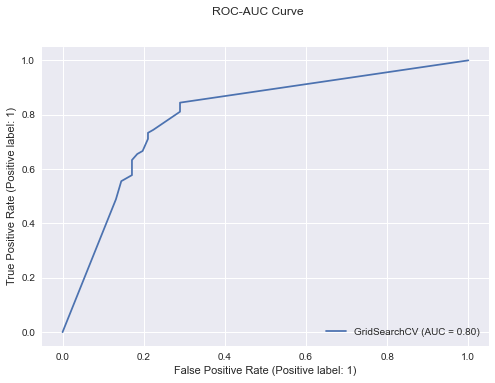

In [112]:
plt.style.use('seaborn')
ROC_AUC = metrics.plot_roc_curve(best_param_grid, X_test, Y_test)
ROC_AUC.figure_.suptitle("ROC-AUC Curve")
plt.show()

In [113]:
import joblib
joblib.dump(best_param_grid, "Loan_Application_Status_Prediction.pkl")

['Loan_Application_Status_Prediction.pkl']

In [114]:
new_predict = joblib.load(open('Loan_Application_Status_Prediction.pkl','rb'))
result=new_predict.score(X_test,Y_test)
print(result*100)

74.69879518072288


In [115]:
Prediction = pd.DataFrame([new_predict.predict(X_test)[:],best_Gcv_predict[:]],index=['Predicted','Original'])
Prediction

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
Predicted,1,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,0,1
Original,1,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,0,1
